# Analysis SII in noise sii_Sbcd65_Nfront65

22 July 2023 Guido Cattani

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
from scipy.stats import wilcoxon as wilcoxon
from scipy.stats import rankdata as rankdata
from scipy.stats import shapiro as shapiro

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def read_sii():
    f_in =  '/media/guido/LACIE/Cingle_Guido/Master/Implant/Calculated_data/SII_Sbcd65_Nfront65.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in, index_col = 'Study_ID')
    df = df.fillna(pd.NA)
    return df

In [5]:
def descriptive_stat(df):
    # calculate quantiles
    quantiles = df.quantile([0.1, 0.5, 0.9]).round(3)
    quantiles.index = ['P10', 'P50', 'P90']
 
    # calculate mean and standard deviation
    mean_values = (pd.DataFrame({'Mean': df.mean().round(3)})).T
    std_values = (pd.DataFrame({'St. dev.': df.std().round(3)})).T

    # perform Shapiro test 
    sht = shapiro_test_norm(df)

    # combine results into a single DataFrame
    res = pd.concat([quantiles, mean_values, std_values, sht])
    
    return res.round(3)

In [6]:
def shapiro_test_norm(df):
    # check normality with Shapiro-Wilk test
    shapiro_result = df.apply(lambda x: shapiro(x) if len(x) >= 3 else (float('nan'), float('nan')))
    
    shapiro_stats = shapiro_result.apply(lambda x: round(x[0], 3))
    p_values = shapiro_result.apply(lambda x: round(x[1], 3))
    is_normal = p_values >= 0.05
    
    shapiro_test = pd.DataFrame({
        'Shapiro test statistic': shapiro_stats,
        'p-value': p_values,
        'normally distributed': is_normal
    }).transpose()
    
    return shapiro_test

In [7]:
sii = read_sii()
sii

,AC_path,BC_path,AC&BC_path,diff_combi_AC
Study_ID,,,,
34,0.319,0.476,0.439,0.120
35,0.319,0.461,0.426,0.107
43,0.325,0.465,0.372,0.047
47,0.325,0.444,0.459,0.134
50,0.325,0.451,0.357,0.032
53,0.325,0.381,0.373,0.048
54,0.319,0.405,0.470,0.151
56,0.319,0.417,0.478,0.159
59,0.325,0.370,0.370,0.045


In [8]:
des_stat = descriptive_stat(sii)
des_stat

,AC_path,BC_path,AC&BC_path,diff_combi_AC
P10,0.319,0.393,0.37,0.045
P50,0.325,0.429,0.404,0.08
P90,0.325,0.461,0.471,0.152
Mean,0.323,0.427,0.413,0.09
St. dev.,0.003,0.027,0.039,0.041
Shapiro test statistic,0.588,0.983,0.927,0.925
p-value,0.0,0.967,0.134,0.121
normally distributed,False,True,True,True


In [9]:
# name file quantiles results
f_ar = "SII_SbcdNfront.csv"

In [10]:
# save quantiles to file
d_ar = "/media/guido/LACIE/Cingle_Guido/Master/Implant/Analysis_Results/"
p_ar = Path(d_ar + f_ar)
des_stat.to_csv(p_ar)

In [11]:
score = sii.T.to_numpy()

In [12]:
# Wilcoxon signed-rank
w = wilcoxon(score[3])
w

WilcoxonResult(statistic=0.0, pvalue=1.9073486328125e-06)

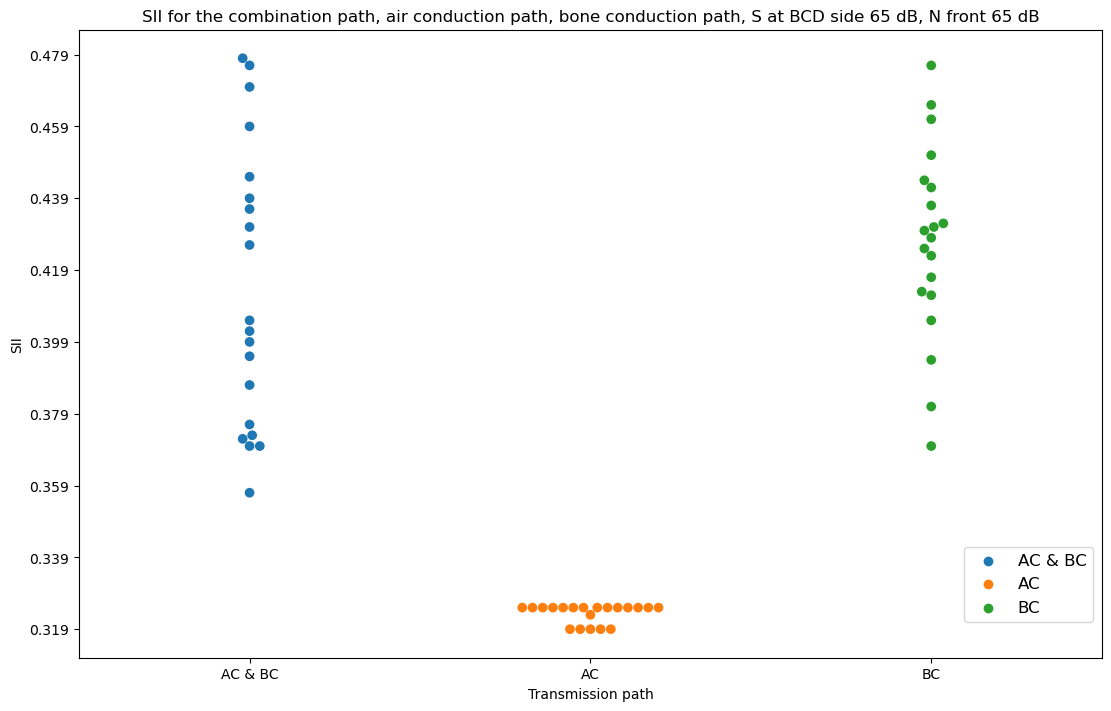

In [13]:
# make a figure to plot SII for the 3 paths
ttl = 'SII for the combination path, air conduction path, bone conduction path, S at BCD side 65 dB, N front 65 dB'
sii_combi = sii['AC&BC_path']
sii_ac = sii['AC_path']
sii_bc = sii['BC_path']
tp = pd.melt(pd.DataFrame( {'AC & BC' : sii_combi, 'AC' : sii_ac, 'BC' : sii_bc }), 
             var_name = 'Transmission path', value_name = 'SII') 

fig, ax = plt.subplots(constrained_layout=True)

sns.color_palette("colorblind")

hh = 7
ww = hh * 1.6180339887
ww = round (ww, 0)

fig.set_figheight(hh)
fig.set_figwidth(ww)

ax = sns.swarmplot(data = tp, x = 'Transmission path', y = 'SII', hue = 'Transmission path', size=7)

ax.set_title(ttl)
ax.set_yticks(np.arange(np.min(score[:-1]), np.max(score[:-1]) + 0.02, 0.02))
plt.legend(bbox_to_anchor=(1, 0.19), fontsize='large')

# save the figure
plt.savefig('/media/guido/LACIE/Cingle_Guido/Master/Implant/Analysis_Graphs/SII_SbcdNfront.tiff', 
            transparent=False, dpi=500, bbox_inches="tight")

plt.show()